<a href="https://colab.research.google.com/github/SubhamMohanty187/Data-Science/blob/main/Projects/Case_Study1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-1>
  Your Friend has developed the Product and he wants to establish the product 
startup and he is searching for a perfect location where getting the investment has a high 
chance. But due to its financial restriction, he can choose only between three locations -
Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the 
location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most 
number of funding is done. That means, find the location where startups has received 
funding maximum number of times. Plot the bar graph between location and number of 
funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. 
That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as 
"Bangalore". For few startups multiple locations are given, one Indian and one Foreign. 
Consider the startup if any one of the city lies in given locations.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
files = files.upload()

Saving startup_funding.csv to startup_funding.csv


In [ ]:
data = pd.read_csv("startup_funding.csv")
df = data.copy()

Filter NaN Values

In [ ]:
df.dropna(inplace=True, subset=["CityLocation"])
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2188,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2189,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2190,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN
2191,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"500,000",NaN


In [ ]:
df.loc[df["CityLocation"]=="SFO / Bangalor"]   #Search for a Particular Row Value

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks


we have to find yearwise funding stats so we convert the date column into year only format

In [ ]:
y= []
for i in df["Date"].values:
  if "." in i:
    y.append(i.split(".")[-1])
  else:
    y.append(i.split("/")[-1])
df["Date"]=y

In [ ]:
year_count = df["Date"].value_counts()
year_count

2016    988
2015    762
2017    443
Name: Date, dtype: int64

Total No. of fundings per year in ascending order

In [ ]:
year = year_count.index
fund = year_count.values
yr = np.argsort(year)
for i in yr:
  print(year[i], fund[i])

2015 762
2016 988
2017 443


In [ ]:
df["CityLocation"].index

RangeIndex(start=0, stop=2193, step=1)

In [ ]:
def indian_city(city):
  return city.split("/")[0].strip()

In [ ]:
df["CityLocation"] = df["CityLocation"].apply(indian_city)
df["CityLocation"]

0       Bangalore
1          Mumbai
2       New Delhi
3          Mumbai
4       Hyderabad
          ...    
2188    Bangalore
2189    Bangalore
2190    Bangalore
2191      Chennai
2192        Noida
Name: CityLocation, Length: 2193, dtype: object

In [ ]:
df['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
df['CityLocation'].replace("Delhi", "New Delhi", inplace = True)

In [ ]:
#filtering the cities on the basis of given conditions
df = df[(df['CityLocation'] == "Bangalore") | (df['CityLocation'] == "Mumbai") | (df['CityLocation'] == "Gurgaon") | (df['CityLocation'] == "Noida") | (df['CityLocation'] == "New Delhi")]

In [ ]:
temp = df["CityLocation"].value_counts()
city = temp.index
funds = temp.values
print("city=",city.dtype)
print("funds=",funds.dtype)

Bangalore    635
Mumbai       449
New Delhi    389
Gurgaon      241
Noida         79
Name: CityLocation, dtype: int64

In [ ]:
print("city with most funding: ",city[0],"\nfunds: ",funds[0])

city with most funding:  Bangalore 
funds:  635


###Ploting the BarGraph for city vs funds

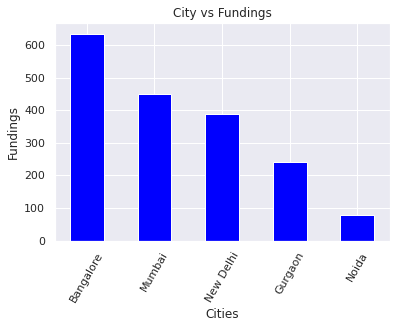

In [ ]:
plt.bar(city,funds,color="Blue",width = 0.5)
plt.xlabel("Cities")
plt.ylabel("Fundings")
plt.title("City vs Fundings")
plt.xticks(rotation=60)

plt.show()

In [ ]:
li = list(zip(city,funds))
freq = pd.DataFrame(li, columns=["City","Funds Received"])
freq

,City,Funds Received
0,Bangalore,635
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79
